# Henry's Spotify Data Analysis


In [1]:
import pandas as pd
import json
import numpy as np
global_df = pd.read_csv('dataset_cleaned.csv')
global_df.columns

Index(['track_id', 'album_name', 'track_name', 'duration_ms', 'explicit',
       'popularity', 'danceability', 'energy', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'track_genre', 'artist_1', 'artist_2', 'artist_3', 'tempo_scaled',
       'loudness_scaled'],
      dtype='object')

## Import Your Library JSON


In [2]:
# Load the JSON file
with open('yourlibrary.json', 'r') as f:
    data = json.load(f)

# Convert the tracks array to a DataFrame
personal_df_raw = pd.DataFrame(data['tracks'])

# Display basic information about the DataFrame
print(f"Shape: {personal_df_raw.shape}")
print(f"\nColumns: {personal_df_raw.columns.tolist()}")
print(f"\nFirst few rows:")
personal_df_raw.head()

Shape: (13079, 4)

Columns: ['artist', 'album', 'track', 'uri']

First few rows:


artist          album                  track  \
0  Bob Marley & The Wailers       Uprising             Zion Train   
1             Stefon Harris    Sonic Creed          Gone Too Soon   
2             John Coltrane  Coltrane Jazz       Some Other Blues   
3               Belly Squad         Banana         Banana - Remix   
4              Flying Lotus    Cosmogramma  Intro//A Cosmic Drama   

                                    uri  
0  spotify:track:2Uqayp7267V5SJYOf7fLmV  
1  spotify:track:5vmO3daxuAfgvwI5pWtdx6  
2  spotify:track:2sPYMwKLE37feNNdwDcYpL  
3  spotify:track:2wIdu9pRpXkTjFwdyOShgn  
4  spotify:track:61z0V2sucJ90PkegVA0up3

In [3]:
# Strip whitespace and convert to lowercase for artist, album, and track columns
personal_df_raw['artist'] = personal_df_raw['artist'].str.strip().str.lower()
personal_df_raw['album'] = personal_df_raw['album'].str.strip().str.lower()
personal_df_raw['track'] = personal_df_raw['track'].str.strip().str.lower()
print(len(personal_df_raw))
print("Cleaned columns - first few rows:")

# Drop duplicates in eprsonal data:
personal_df_raw = personal_df_raw.drop_duplicates(
    subset=['track', 'artist'], keep='first')
print(len(personal_df_raw))

13079
Cleaned columns - first few rows:
12361


In [4]:
# Load the cleaned dataset CSV
global_df = pd.read_csv('dataset_cleaned.csv')

# Display basic information about the DataFrame
print(f"Shape: {global_df.shape}")
print(f"\nColumns: {global_df.columns.tolist()}")
print(f"\nFirst few rows:")
global_df.head()

Shape: (78497, 20)

Columns: ['track_id', 'album_name', 'track_name', 'duration_ms', 'explicit', 'popularity', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'track_genre', 'artist_1', 'artist_2', 'artist_3', 'tempo_scaled', 'loudness_scaled']

First few rows:


track_id                                         album_name  \
0  5suoikwirypmvoiqdjugsv                                             comedy   
1  4qpndbw1i3p13qlct0ki3a                                   ghost (acoustic)   
2  1ijbsr7s7jyxzm8egcbk5b                                     to begin again   
3  6lfxq3cg4xttieg7opycyx  crazy rich asians (original motion picture sou...   
4  5vjlsffimiip26qg5wcn2k                                            hold on   

                   track_name  duration_ms  explicit  popularity  \
0                      comedy       230666         0          73   
1            ghost - acoustic       149610         0          55   
2              to begin again       210826         0          57   
3  can't help falling in love       201933         0          71   
4                     hold on       198853         0          82   

   danceability  energy  mode  speechiness  acousticness  instrumentalness  \
0         0.676  0.4610     0       0.1430        0.0322          0.000001   
1         0.420  0.1660     1       0.0763        0.9240          0.000006   
2         0.438  0.3590     1       0.0557        0.2100          0.000000   
3         0.266  0.0596     1       0.0363        0.9050          0.000071   
4         0.618  0.4430     1       0.0526        0.4690          0.000000   

   liveness  valence track_genre           artist_1 artist_2 artist_3  \
0    0.3580    0.715    acoustic        gen hoshino      NaN      NaN   
1    0.1010    0.267    acoustic       ben woodward      NaN      NaN   
2    0.1170    0.120    acoustic  ingrid michaelson     zayn      NaN   
3    0.1320    0.143    acoustic       kina grannis      NaN      NaN   
4    0.0829    0.167    acoustic   chord overstreet      NaN      NaN   

   tempo_scaled  loudness_scaled  
0      0.361245         0.144774  
1      0.318397         0.369908  
2      0.313643         0.208907  
3      0.746758         0.397381  
4      0.492863         0.207770

## Merge personal_df_raw and global_df


In [5]:
# Join personal_df_raw and global_df based on matching artist, and track
# We need to check if personal_df_raw['artist'] matches ANY of the artist columns in global_df
# Merge personal_df_raw and global_df where personal_df_raw.artist matches global_df.artist_1 AND personal_df_raw.track matches global_df.track_name
personal_df = personal_df_raw.merge(
    global_df,
    left_on=['artist', 'track'],
    right_on=['artist_1', 'track_name'],
    how='inner'
)

print(f"Original personal_df_raw shape: {personal_df_raw.shape}")
print(f"Original global_df shape: {global_df.shape}")
print(f"Merged dataframe shape: {personal_df.shape}")
print(f"\nNumber of songs from your library that matched: {len(personal_df)}")
print(f"\nFirst few rows:")
personal_df.head()

Original personal_df_raw shape: (12361, 4)
Original global_df shape: (78497, 20)
Merged dataframe shape: (478, 24)

Number of songs from your library that matched: 478

First few rows:


artist             album                        track  \
0          badfinger       straight up  baby blue - remastered 2010   
1          the kinks             kinks            you really got me   
2  souls of mischief  93 'til infinity             93 'til infinity   
3           autechre             amber                         foil   
4         eric prydz              opus                         opus   

                                    uri                track_id  \
0  spotify:track:6S3JlDAGk3uu3NtZbPnuhS  6s3jldagk3uu3ntzbpnuhs   
1  spotify:track:29SyMC0plk6qw8NMF7lfRL  6mcn8ywhqq1nkfvahvxfrz   
2  spotify:track:0PV1TFUMTBrDETzW6KQulB  0pv1tfumtbrdetzw6kqulb   
3  spotify:track:7uXRhVsCHwKVV8gYeA5CXS  07c2miiiwvueqcnwxpho67   
4  spotify:track:3v2oAQomhOcYCPPHafS3KV  3v2oaqomhocycpphafs3kv   

                                       album_name  \
0  straight up (remastered 2010 / deluxe edition)   
1                classics (the best of the kinks)   
2                                93 'til infinity   
3                                           amber   
4                                            opus   

                    track_name  duration_ms  explicit  popularity  ...  \
0  baby blue - remastered 2010       217346         0          67  ...   
1            you really got me       132777         0          38  ...   
2             93 'til infinity       286440         0          71  ...   
3                         foil       364733         0          37  ...   
4                         opus       543453         0          64  ...   

   acousticness  instrumentalness  liveness  valence        track_genre  \
0      0.018900          0.013400    0.0728    0.515              blues   
1      0.091100          0.000260    0.0809    0.960            british   
2      0.125000          0.000001    0.1470    0.688           hardcore   
3      0.685000          0.942000    0.1290    0.158                idm   
4      0.000702          0.821000    0.0792    0.184  progressive-house   

            artist_1  artist_2  artist_3 tempo_scaled loudness_scaled  
0          badfinger       NaN       NaN     0.511279        0.167139  
1          the kinks       NaN       NaN     0.564543        0.079459  
2  souls of mischief       NaN       NaN     0.847456        0.253080  
3           autechre       NaN       NaN     0.509779        0.339343  
4         eric prydz       NaN       NaN     0.514258        0.133527  

[5 rows x 24 columns]

In [6]:
# Save the merged dataframe to CSV
personal_df.to_csv('personal_df.csv', index=False)
print("Saved personal_df to personal_df.csv")
personal_df.columns

Saved personal_df to personal_df.csv


Index(['artist', 'album', 'track', 'uri', 'track_id', 'album_name',
       'track_name', 'duration_ms', 'explicit', 'popularity', 'danceability',
       'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'track_genre', 'artist_1', 'artist_2',
       'artist_3', 'tempo_scaled', 'loudness_scaled'],
      dtype='object')

# Model Prep


## Splitting Track Features and Metadata


In [7]:
personal_df.drop(columns=['artist', 'album', 'track', 'uri'], inplace=True)

In [8]:
personal_df.columns

Index(['track_id', 'album_name', 'track_name', 'duration_ms', 'explicit',
       'popularity', 'danceability', 'energy', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'track_genre', 'artist_1', 'artist_2', 'artist_3', 'tempo_scaled',
       'loudness_scaled'],
      dtype='object')

In [9]:
# Metadata col
metadata_cols = ['track_id', 'track_name', 'artist_1', 'artist_2',
                 'artist_3', 'album_name',  'duration_ms', 'popularity', 'explicit']
# Audio feature cols
audio_feature_cols = ['danceability', 'energy', 'loudness_scaled', 'mode', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo_scaled']

# Split global data into audio_features and metadata
global_metadata_df = global_df[metadata_cols]
global_feature_value_df = global_df[audio_feature_cols]

In [10]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# import matplotlib.pyplot as plt

# # Sample 5000 rows from global_feature_value_df
# df_sample = global_feature_value_df.sample(n=5000, random_state=42)

# # Create linkage matrix (no scaling needed - data already scaled)
# linkage_matrix = linkage(df_sample, method='ward')

# # Plot dendrogram
# plt.figure(figsize=(15, 8))
# dendrogram(linkage_matrix,
#            truncate_mode='lastp',
#            p=40,
#            leaf_rotation=90,
#            leaf_font_size=10,
#            show_contracted=True)
# plt.title('Hierarchical Clustering Dendrogram (5000 samples, Ward Linkage)', fontsize=16)
# plt.xlabel('Cluster Size', fontsize=12)
# plt.ylabel('Distance', fontsize=12)
# plt.tight_layout()
# plt.show()

In [11]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample data (use same sample as dendrogram)
# df_sample = global_feature_value_df.sample(n=5000, random_state=42)

# # Create clustermap
# plt.figure(figsize=(12, 10))
# sns.clustermap(df_sample,
#                method='ward',
#                cmap='viridis',
#                figsize=(12, 10),
#                cbar_kws={'label': 'Feature Value'})
# plt.show()

In [12]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import AgglomerativeClustering

# silhouette_values_hier = []

# for k in range(2, 10):
#     agg_temp = AgglomerativeClustering(n_clusters=k)
#     agg_temp.fit(df_sample)
#     silhouette = silhouette_score(df_sample, agg_temp.labels_)
#     silhouette_values_hier.append(silhouette)

# silhouette_series_hier = pd.Series(silhouette_values_hier, index=range(2, 10))

# silhouette_series_hier.plot(marker='o')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.title("Hierarchical Clustering: Number of Clusters vs. Silhouette Score")

Using entire dataset: 78497 tracks

Calculating inertia for different K values...
  Computing K=2...
    K=2: Inertia=36222.35
  Computing K=3...
    K=3: Inertia=29469.19
  Computing K=4...
    K=4: Inertia=25584.27
  Computing K=5...
    K=5: Inertia=22925.90
  Computing K=6...
    K=6: Inertia=20624.47
  Computing K=7...
    K=7: Inertia=18476.56
  Computing K=8...
    K=8: Inertia=17084.85
  Computing K=9...
    K=9: Inertia=16113.12
  Computing K=10...
    K=10: Inertia=14894.84
  Computing K=11...
    K=11: Inertia=14135.48
  Computing K=12...
    K=12: Inertia=13316.36
  Computing K=13...
    K=13: Inertia=12850.06
  Computing K=14...
    K=14: Inertia=12371.68


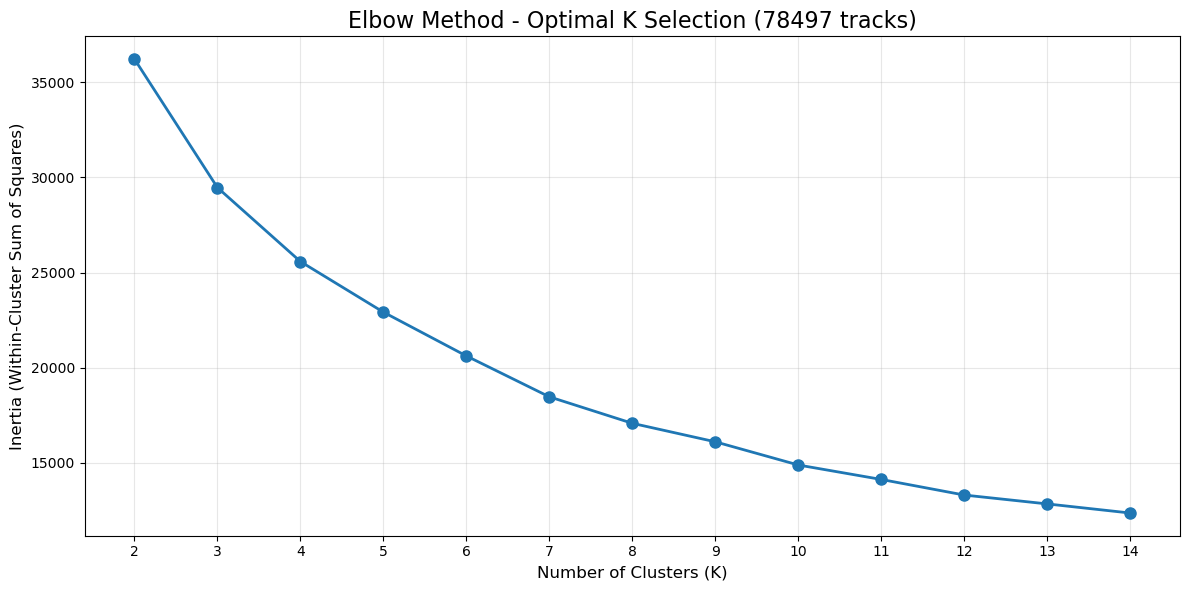


Look for the 'elbow' point where inertia starts to decrease more slowly.


In [13]:
# ============================================================================
# ELBOW METHOD - Finding Optimal K using Inertia
# ============================================================================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use entire dataset
print(f"Using entire dataset: {len(global_feature_value_df)} tracks")

# Calculate inertia for different values of K
inertias = []
K_range = range(2, 15)

print("\nCalculating inertia for different K values...")
for k in K_range:
    print(f"  Computing K={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(global_feature_value_df)
    inertias.append(kmeans.inertia_)
    print(f"    K={k}: Inertia={kmeans.inertia_:.2f}")

# Plot the elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title(
    f'Elbow Method - Optimal K Selection ({len(global_feature_value_df)} tracks)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("\nLook for the 'elbow' point where inertia starts to decrease more slowly.")

In [15]:
# ============================================================================
# K-MEANS CLUSTERING: Cluster entire dataset into 6 clusters
# ============================================================================

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

print("Clustering entire dataset into 6 clusters using K-Means...")

# Perform K-Means clustering on global_feature_value_df
kmeans = KMeans(n_clusters=6, random_state=42, n_init=200, max_iter=600)
cluster_labels = kmeans.fit_predict(global_feature_value_df)

print(
    f"Clustering complete! Clustered {len(cluster_labels)} tracks into 6 clusters.")
print("\nCluster Sizes:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} tracks")

# ============================================================================
# STEP 2: Calculate and save average feature values for each cluster
# ============================================================================

print("\n" + "="*80)
print("Calculating average feature values for each cluster...")

# Create a temporary dataframe with features and cluster labels
feature_cluster_df = global_feature_value_df.copy()
feature_cluster_df['cluster'] = cluster_labels

# Calculate mean feature values for each cluster
cluster_profiles = feature_cluster_df.groupby(
    'cluster')[audio_feature_cols].mean()

# Add cluster size to the profiles
cluster_profiles['cluster_size'] = feature_cluster_df.groupby('cluster').size()

print("\nCluster Profiles (Average Feature Values):")
print(cluster_profiles.round(3))

# Save cluster profiles to CSV
cluster_profiles.to_csv('kmeans_cluster_profiles.csv')
print("\n✓ Saved cluster profiles to 'kmeans_cluster_profiles.csv'")

# ============================================================================
# STEP 3: Add cluster labels to dataset_cleaned and save
# ============================================================================

print("\n" + "="*80)
print("Adding cluster labels to dataset_cleaned.csv...")

# Read the original dataset_cleaned.csv
dataset_cleaned = pd.read_csv('dataset_cleaned.csv')

# Add the main cluster column
dataset_cleaned['main_cluster'] = cluster_labels

# Display sample with cluster labels
print("\nSample of data with cluster labels:")
print(dataset_cleaned[['track_name', 'artist_1', 'main_cluster',
      'danceability', 'energy', 'valence']].head(10))

# Save the updated dataset with cluster labels
dataset_cleaned.to_csv('dataset_cleaned_with_kmeans_clusters.csv', index=False)
print("\n✓ Saved dataset with cluster labels to 'dataset_cleaned_with_kmeans_clusters.csv'")

print("\n" + "="*80)
print("K-MEANS CLUSTERING COMPLETE!")
print("="*80)
print(f"Total tracks clustered: {len(cluster_labels)}")
print(f"Number of clusters: 6")
print(f"Inertia (within-cluster sum of squares): {kmeans.inertia_:.2f}")
print(f"\nOutput files:")
print(f"  1. kmeans_cluster_profiles.csv - Average feature values for each cluster")
print(f"  2. dataset_cleaned_with_kmeans_clusters.csv - Original dataset with 'main_cluster' column (0-5) added")

#   Cluster 0: 5223 tracks
#   Cluster 1: 14896 tracks
#   Cluster 2: 25335 tracks
#   Cluster 3: 22103 tracks
#   Cluster 4: 5734 tracks
#   Cluster 5: 5206 tracks

Clustering entire dataset into 6 clusters using K-Means...
Clustering complete! Clustered 78497 tracks into 6 clusters.

Cluster Sizes:
  Cluster 0: 5223 tracks
  Cluster 1: 14896 tracks
  Cluster 2: 25335 tracks
  Cluster 3: 22103 tracks
  Cluster 4: 5734 tracks
  Cluster 5: 5206 tracks

Calculating average feature values for each cluster...

Cluster Profiles (Average Feature Values):
         danceability  energy  loudness_scaled   mode  speechiness  \
cluster                                                              
0               0.573   0.715            0.193  0.000        0.069   
1               0.544   0.435            0.218  1.000        0.090   
2               0.582   0.768            0.130  1.000        0.087   
3               0.594   0.687            0.153  0.000        0.101   
4               0.561   0.761            0.182  1.000        0.075   
5               0.369   0.175            0.442  0.668        0.052   

         acousticness  instrumentalness  liveness 

Below are the final mood labels for each cluster, along with the reasoning behind each one.

---

## ## **Cluster Summary Table**

| Cluster | Mood Label                |
| ------- | ------------------------- |
| **0**   | Moody Energetic           |
| **1**   | Sad / Reflective          |
| **2**   | Happy / Energetic         |
| **3**   | Warm / Feel-Good          |
| **4**   | Intense / Driven          |
| **5**   | Melancholy / Peaceful Sad |

---

# 🎯 **Cluster Explanations**

---

## **Cluster 0 — “Moody Energetic”**

> **Reasoning:**
>
> - Medium–high energy
> - Moderate danceability
> - Low valence → emotionally darker
> - Low acousticness → tense / not warm
>
> **Mood:** Moody Energetic

---

## **Cluster 1 — “Sad / Reflective”**

> **Reasoning:**
>
> - Low energy
> - High acousticness → soft, intimate
> - Lower valence → emotional / wistful
> - Slightly higher speechiness → expressive
>
> **Mood:** Sad / Reflective

---

## **Cluster 2 — “Happy / Energetic”**

> **Reasoning:**
>
> - Highest energy of all clusters
> - High danceability
> - Highest valence → cheerful / bright
> - Low acousticness → lively
>
> **Mood:** Happy / Energetic

---

## **Cluster 3 — “Warm / Feel-Good”**

> **Reasoning:**
>
> - Medium–high energy
> - Good danceability
> - Moderately positive valence
> - Moderate acousticness → warmth
>
> **Mood:** Warm / Feel-Good

---

## **Cluster 4 — “Intense / Driven”**

> **Reasoning:**
>
> - High energy
> - Low valence → serious, not cheerful
> - Low acousticness → sharper / aggressive tone
> - Very high instrumentalness → focused
>
> **Mood:** Intense / Driven

---

## **Cluster 5 — “Melancholy / Peaceful Sad”**

> **Reasoning:**
>
> - Lowest energy
> - Highest acousticness
> - Lowest valence → emotional heaviness
> - High instrumentalness → quiet, drifting
>
> **Mood:** Melancholy / Peaceful Sad


In [16]:
# Mood label dictionary
mood_labels = {
    0: "Moody Energetic",
    1: "Sad / Reflective",
    2: "Happy / Energetic",
    3: "Warm / Feel-Good",
    4: "Intense / Driven",
    5: "Melancholy / Peaceful Sad"
}

## Create subclusters

We would like to further split each cluster into subclusters according to cluster size
The logic is <10000 songs, dont split. 10000<=songs in cluster <20000 we split into 2, and above 20000 we split into 3.


In [17]:
# ============================================================================
# CREATE SUBCLUSTERS: Split clusters based on size
# Logic: <10000 = no split, 10000-20000 = 2 subclusters, >20000 = 3 subclusters
# ============================================================================

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

print("Creating subclusters based on main cluster sizes...")
print("\nSubclustering Logic:")
print("  < 10,000 songs: No split (subcluster = 0)")
print("  10,000 - 20,000 songs: Split into 2 subclusters")
print("  > 20,000 songs: Split into 3 subclusters")
print("\n" + "="*80)

# Read the dataset with main clusters
dataset_with_clusters = pd.read_csv('dataset_cleaned_with_kmeans_clusters.csv')

# Initialize subcluster labels array
subcluster_labels = np.zeros(len(dataset_with_clusters), dtype=int)

# Process each main cluster
for cluster_id in range(6):
    # Get data for this cluster
    cluster_mask = dataset_with_clusters['main_cluster'] == cluster_id
    cluster_indices = np.where(cluster_mask)[0]
    cluster_size = len(cluster_indices)

    # Get feature data for this cluster
    cluster_features = global_feature_value_df.iloc[cluster_indices]

    # Determine number of subclusters based on size
    if cluster_size < 10000:
        n_subclusters = 1  # No split
        print(
            f"Cluster {cluster_id}: {cluster_size:,} tracks -> No split (too small)")
    elif cluster_size < 20000:
        n_subclusters = 2
        print(
            f"Cluster {cluster_id}: {cluster_size:,} tracks -> 2 subclusters")
    else:
        n_subclusters = 3
        print(
            f"Cluster {cluster_id}: {cluster_size:,} tracks -> 3 subclusters")

    # Perform subclustering
    if n_subclusters == 1:
        # No split - all songs get subcluster 0
        sub_labels = np.zeros(cluster_size, dtype=int)
    else:
        # Use K-Means to create subclusters
        kmeans_sub = KMeans(n_clusters=n_subclusters,
                            random_state=42, n_init=10)
        sub_labels = kmeans_sub.fit_predict(cluster_features)

    # Assign subcluster labels
    subcluster_labels[cluster_indices] = sub_labels

# Add subcluster column to dataset
dataset_with_clusters['subcluster'] = subcluster_labels

print("\n" + "="*80)
print("Subcluster Summary:")
print("="*80)

for cluster_id in range(6):
    cluster_data = dataset_with_clusters[dataset_with_clusters['main_cluster'] == cluster_id]
    n_subclusters = cluster_data['subcluster'].nunique()

    print(f"\nMain Cluster {cluster_id} ({len(cluster_data):,} tracks):")
    print(f"  Number of subclusters: {n_subclusters}")

    # Show subcluster sizes
    subcluster_counts = cluster_data['subcluster'].value_counts().sort_index()
    for sub_id, count in subcluster_counts.items():
        print(f"    Subcluster {sub_id}: {count:,} tracks")

# Calculate average features for each subcluster within each main cluster
print("\n" + "="*80)
print("Subcluster Profiles:")
print("="*80)

subcluster_profiles_list = []

for cluster_id in range(6):
    cluster_data = dataset_with_clusters[dataset_with_clusters['main_cluster'] == cluster_id]

    print(f"\n{'='*80}")
    print(f"Main Cluster {cluster_id}")
    print(f"{'='*80}")

    for sub_id in sorted(cluster_data['subcluster'].unique()):
        sub_mask = cluster_data['subcluster'] == sub_id
        sub_indices = cluster_data[sub_mask].index
        sub_features = global_feature_value_df.iloc[sub_indices]

        # Calculate mean features
        sub_profile = sub_features.mean()
        sub_profile['main_cluster'] = cluster_id
        sub_profile['subcluster'] = sub_id
        sub_profile['size'] = len(sub_indices)

        subcluster_profiles_list.append(sub_profile)

        print(
            f"\n  Subcluster {cluster_id}.{sub_id} ({len(sub_indices):,} tracks):")
        print(f"    Danceability: {sub_profile['danceability']:.3f}")
        print(f"    Energy: {sub_profile['energy']:.3f}")
        print(f"    Valence: {sub_profile['valence']:.3f}")
        print(f"    Acousticness: {sub_profile['acousticness']:.3f}")
        print(f"    Instrumentalness: {sub_profile['instrumentalness']:.3f}")

# Create DataFrame of subcluster profiles
subcluster_profiles_df = pd.DataFrame(subcluster_profiles_list)

# Save subcluster profiles to CSV
subcluster_profiles_df.to_csv('kmeans_subcluster_profiles.csv', index=False)
print("\n✓ Saved subcluster profiles to 'kmeans_subcluster_profiles.csv'")

# Save the dataset with both main clusters and subclusters
dataset_with_clusters.to_csv(
    'dataset_cleaned_with_kmeans_subclusters.csv', index=False)
print("✓ Saved dataset with subclusters to 'dataset_cleaned_with_kmeans_subclusters.csv'")

# Display sample
print("\n" + "="*80)
print("Sample of data with cluster and subcluster labels:")
print("="*80)
print(dataset_with_clusters[['track_name', 'artist_1', 'main_cluster',
      'subcluster', 'danceability', 'energy', 'valence']].head(15))

print("\n" + "="*80)
print("SUBCLUSTERING COMPLETE!")
print("="*80)
print(f"\nOutput files:")
print(f"  1. kmeans_subcluster_profiles.csv - Average features for each subcluster")
print(f"  2. dataset_cleaned_with_kmeans_subclusters.csv - Dataset with 'main_cluster' and 'subcluster' columns")

Creating subclusters based on main cluster sizes...

Subclustering Logic:
  < 10,000 songs: No split (subcluster = 0)
  10,000 - 20,000 songs: Split into 2 subclusters
  > 20,000 songs: Split into 3 subclusters

Cluster 0: 5,223 tracks -> No split (too small)
Cluster 1: 14,896 tracks -> 2 subclusters
Cluster 2: 25,335 tracks -> 3 subclusters
Cluster 3: 22,103 tracks -> 3 subclusters
Cluster 4: 5,734 tracks -> No split (too small)
Cluster 5: 5,206 tracks -> No split (too small)

Subcluster Summary:

Main Cluster 0 (5,223 tracks):
  Number of subclusters: 1
    Subcluster 0: 5,223 tracks

Main Cluster 1 (14,896 tracks):
  Number of subclusters: 2
    Subcluster 0: 8,524 tracks
    Subcluster 1: 6,372 tracks

Main Cluster 2 (25,335 tracks):
  Number of subclusters: 3
    Subcluster 0: 11,996 tracks
    Subcluster 1: 2,436 tracks
    Subcluster 2: 10,903 tracks

Main Cluster 3 (22,103 tracks):
  Number of subclusters: 3
    Subcluster 0: 8,687 tracks
    Subcluster 1: 5,352 tracks
    Subc

In [29]:
import pandas as pd
import gradio as gr
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# --- Your backend logic (kept exactly the same as requested) ---
global_df = pd.read_csv('dataset_cleaned_with_kmeans_subclusters.csv')
personal_df_raw = pd.read_csv('personal_df.csv')

personal_df = personal_df_raw.merge(
    global_df[['track_id', 'main_cluster', 'subcluster']],
    on='track_id',
    how='inner'
)

audio_feature_cols = ['danceability', 'energy', 'loudness_scaled', 'mode', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo_scaled']

CLUSTER_MOODS = {
    0: "Moody Energetic",
    1: "Sad / Reflective",
    2: "Happy / Energetic",
    3: "Warm / Feel-Good",
    4: "Intense / Driven",
    5: "Melancholy / Peaceful Sad"
}


def generate_playlist(mood, n_songs):
    main_cluster = list(CLUSTER_MOODS.keys())[
        list(CLUSTER_MOODS.values()).index(mood)]
    user_songs_in_cluster = personal_df[personal_df['main_cluster']
                                        == main_cluster]

    if user_songs_in_cluster.empty:
        return pd.DataFrame({'Message': [f"You don't have any songs in the '{mood}' category."]})

    subcluster_counts = user_songs_in_cluster['subcluster'].value_counts()
    total_user_songs = len(user_songs_in_cluster)

    subcluster_allocations = {}
    for subcluster, count in subcluster_counts.items():
        ratio = count / total_user_songs
        subcluster_allocations[subcluster] = int(np.round(n_songs * ratio))

    diff = n_songs - sum(subcluster_allocations.values())
    if diff > 0:
        if subcluster_allocations:
            max_subcluster = max(subcluster_allocations,
                                 key=subcluster_allocations.get)
            subcluster_allocations[max_subcluster] += diff

    all_recommendations = []
    personal_features = personal_df[audio_feature_cols].mean(
    ).values.reshape(1, -1)

    for subcluster, num_songs_needed in subcluster_allocations.items():
        if num_songs_needed <= 0:
            continue

        candidates = global_df[
            (global_df['main_cluster'] == main_cluster) &
            (global_df['subcluster'] == subcluster)
        ].copy()

        candidates = candidates[~candidates['track_id'].isin(
            personal_df['track_id'])]

        if candidates.empty:
            continue

        candidate_features = candidates[audio_feature_cols].values

        if personal_features.size == 0 or candidate_features.size == 0:
            continue

        similarities = cosine_similarity(
            personal_features, candidate_features)[0]

        candidates['similarity'] = similarities
        recs = candidates.nlargest(num_songs_needed, 'similarity')
        all_recommendations.append(recs)

    if not all_recommendations:
        return pd.DataFrame({'Message': [f"Could not find new songs matching your '{mood}' profile."]})

    final_playlist = pd.concat(all_recommendations)
    final_playlist['similarity'] = final_playlist['similarity'].apply(
        lambda x: f"{x*100:.0f}%")

    return final_playlist[['track_name', 'artist_1', 'similarity']]

# --- Gradio Interface with Spotify-themed CSS ---


custom_css = """
/* Overall Body Background - Pure Black */
body {
    background-color: #000000 !important; 
    font-family: 'Circular', 'Helvetica Neue', Helvetica, Arial, sans-serif !important;
}

/* Main Gradio Container - Dark Grey like Spotify's main areas */
.gradio-container {
    background-color: #121212 !important; 
    color: #FFFFFF !important;
    border-radius: 8px !important;
    padding: 20px !important; /* Internal padding */
    box-shadow: 0 4px 12px rgba(0, 0, 0, 0.5) !important; /* Subtle shadow */
    max-width: 900px; /* Constrain width for a more app-like feel */
    margin: 30px auto !important; /* Center on page */
}

/* Headings - White for main, lighter grey for sub-headings */
h1, h2, h3, .gr-markdown {
    color: #FFFFFF !important;
    text-align: left !important;
    padding-left: 0 !important;
    margin-bottom: 0.5em !important;
}

/* Main Spotify-like Title */
h1 {
    font-size: 2.2em !important;
    font-weight: bold !important;
    color: #1DB954 !important; /* Spotify Green for the main title */
    margin-bottom: 5px !important;
}

/* Subtitle */
.gr-markdown h3 {
    color: #B3B3B3 !important; /* Lighter grey for descriptive text */
    font-size: 1.1em !important;
    font-weight: normal !important;
    margin-top: 0 !important;
}

/* Labels for inputs */
label {
    color: #B3B3B3 !important; 
    font-weight: 500 !important;
}

/* Input Backgrounds (Dropdown, Slider background) */
.gr-dropdown, .gr-slider {
    background-color: #282828 !important; /* Darker than container, lighter than black */
    border-color: #404040 !important;
    color: #FFFFFF !important;
    border-radius: 4px !important;
}

/* Text inside inputs */
.gr-text-input, .gr-dropdown-item {
    color: #FFFFFF !important;
}

/* Slider Fill - Spotify Green */
.gr-slider-fill {
    background-color: #1DB954 !important;
}

/* Primary Button (Generate Playlist) - Spotify Green */
.gr-button-primary {
    background-color: #1DB954 !important;
    color: #000000 !important; /* Black text on green button */
    font-weight: bold !important;
    border-radius: 500px !important; /* Pill shape */
    padding: 12px 32px !important;
    transition: background-color 0.2s ease, transform 0.2s ease;
    border: none !important;
    margin-top: 20px !important; /* Spacing */
}

.gr-button-primary:hover {
    background-color: #1ED760 !important; /* Slightly lighter green on hover */
    transform: scale(1.02);
}

/* Dataframe (Playlist Output) */
.gr-dataframe {
    background-color: #181818 !important; /* Match input panel background */
    border-radius: 8px !important;
    border: none !important;
    margin-top: 30px !important; /* Spacing */
}

/* Table Header */
.gr-dataframe th {
    background-color: #000000 !important; /* Black header row */
    color: #B3B3B3 !important; 
    font-weight: 400 !important;
    text-transform: uppercase !important;
    text-align: left !important;
    padding: 12px 15px !important;
    border-bottom: 1px solid #404040 !important;
}

/* Table Body Cells */
.gr-dataframe td {
    color: #FFFFFF !important;
    border-color: #303030 !important; /* Subtle separator lines */
    padding: 10px 15px !important;
}

/* Alternating row color and hover effect */
.gr-dataframe tr:nth-child(even) {
    background-color: #1a1a1a !important; /* Very dark grey for even rows */
}
.gr-dataframe tr:hover {
    background-color: #282828 !important; /* Lighter dark grey on hover */
}

/* Hide the default Gradio footer */
.gradio-footer {
    display: none !important;
}
"""

with gr.Blocks(title="Spotify Mood Recommender") as demo:
    demo.css = custom_css  # Apply the custom CSS here!

    # Title and Subtitle
    gr.Markdown("# 🎶 Spotify Mood Recommender")
    gr.Markdown("### Discover your next favorite songs based on your vibe")

    with gr.Row():
        mood = gr.Dropdown(
            choices=list(CLUSTER_MOODS.values()),
            label="Select Your Mood",
            value="Happy / Energetic",
            container=False  # Prevent extra Gradio container around dropdown
        )
        n_songs = gr.Slider(
            minimum=5,
            maximum=50,
            value=20,
            step=1,
            label="Number of Songs",
            container=False  # Prevent extra Gradio container around slider
        )

    btn = gr.Button("Generate Playlist", variant="primary")

    output = gr.Dataframe(
        label="Your Personalized Playlist",
        headers=["TRACK NAME", "ARTIST", "SIMILARITY"],
        interactive=False
    )

    btn.click(generate_playlist, inputs=[mood, n_songs], outputs=output)

demo.launch()

* Running on local URL:  http://127.0.0.1:7866
* To create a public link, set `share=True` in `launch()`.


In [19]:
# T-SNE Visualization of Clusters
from sklearn.manifold import TSNE

T-SNE completed in 319.77 seconds


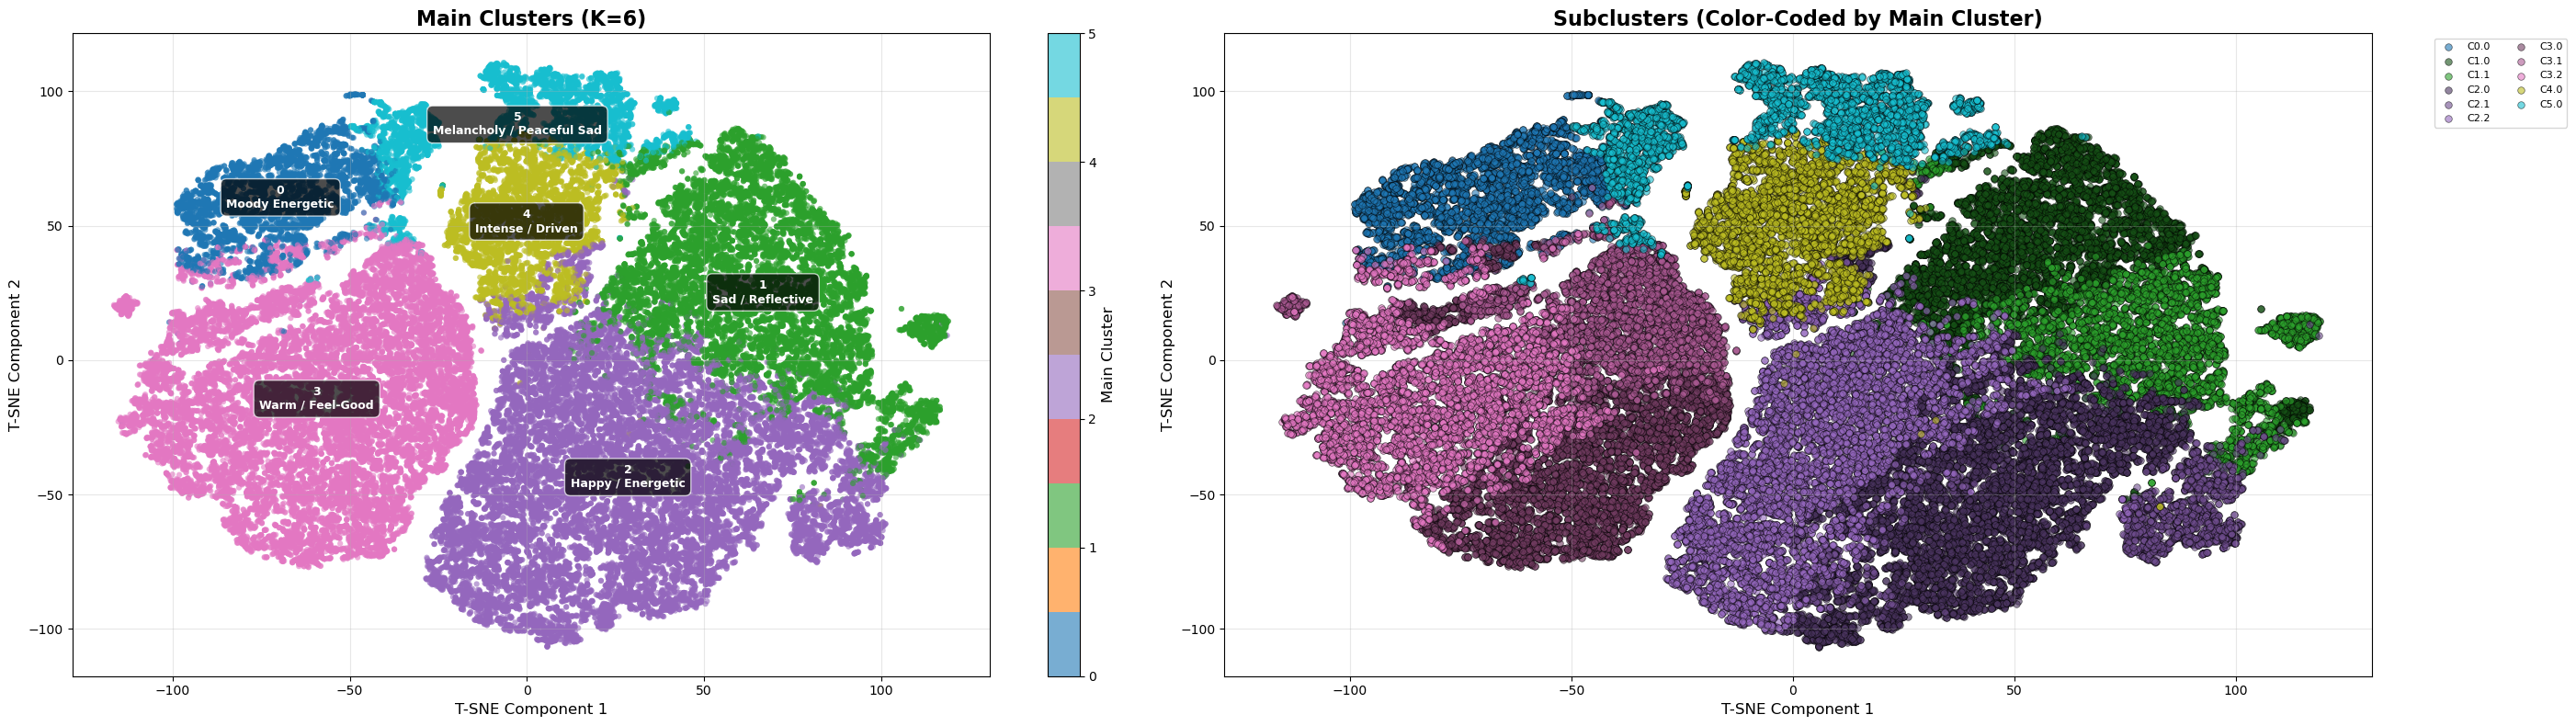

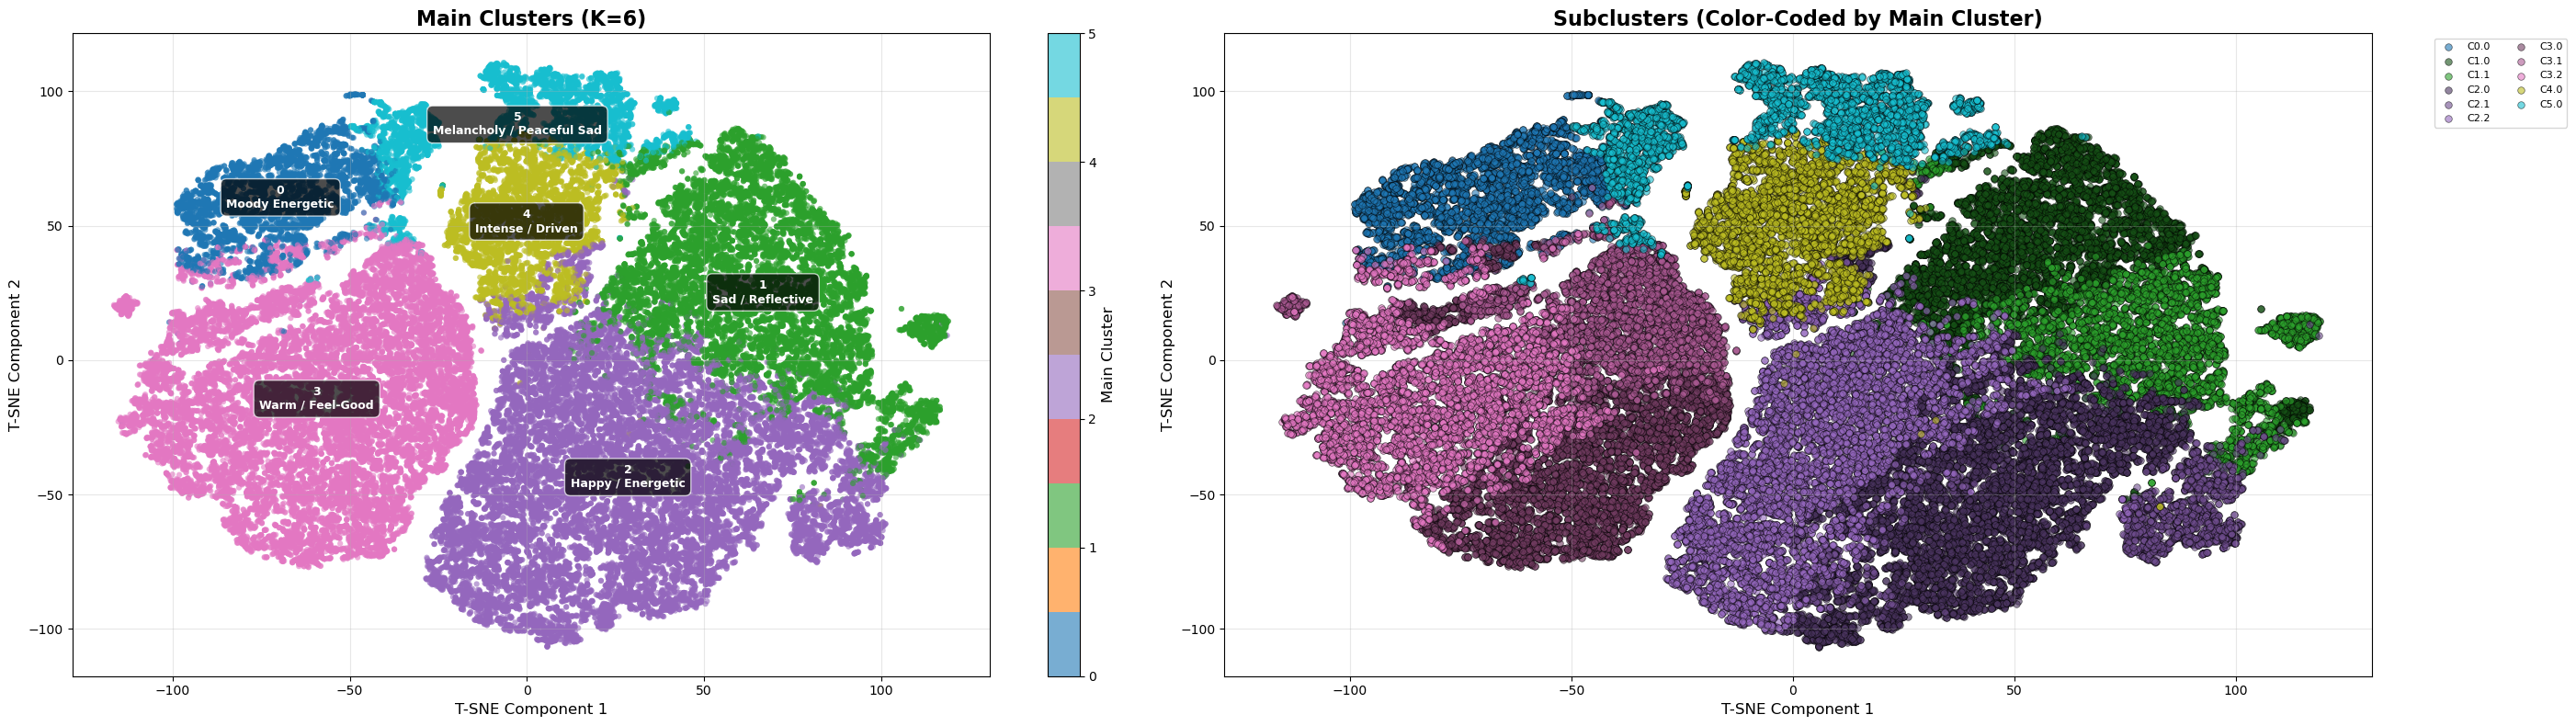

In [20]:
# ============================================================================
# T-SNE VISUALIZATION - 2D Projection of Clusters
# ============================================================================

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Ensure inline plotting
%matplotlib inline

# Load the clustered dataset
dataset_with_clusters = pd.read_csv('dataset_cleaned_with_kmeans_subclusters.csv')

start_time = time.time()

# Apply T-SNE to reduce to 2D
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1000,
    verbose=0
)

# Use the audio features for T-SNE
features_2d = tsne.fit_transform(global_feature_value_df)

elapsed_time = time.time() - start_time
print(f"T-SNE completed in {elapsed_time:.2f} seconds")

# Create the visualization with 3 plots
fig, axes = plt.subplots(1, 2, figsize=(28, 8))

# ============================================================================
# Plot 1: Main Clusters Only
# ============================================================================
scatter1 = axes[0].scatter(
    features_2d[:, 0],
    features_2d[:, 1],
    c=dataset_with_clusters['main_cluster'],
    cmap='tab10',
    alpha=0.6,
    s=20,
    edgecolors='none'
)

axes[0].set_title('Main Clusters (K=6)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('T-SNE Component 1', fontsize=12)
axes[0].set_ylabel('T-SNE Component 2', fontsize=12)
axes[0].grid(True, alpha=0.3)

cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Main Cluster', fontsize=12)

# Add cluster labels with mood names
for cluster_id in range(6):
    cluster_mask = dataset_with_clusters['main_cluster'] == cluster_id
    cluster_center = features_2d[cluster_mask].mean(axis=0)
    mood_name = mood_labels[cluster_id]
    
    axes[0].annotate(
        f'{cluster_id}\n{mood_name}',
        xy=cluster_center,
        fontsize=9,
        fontweight='bold',
        color='white',
        ha='center',
        va='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.7, edgecolor='white')
    )

# ============================================================================
# Plot 2: Subclusters with Main Cluster Color Coding
# ============================================================================
# Define main cluster colors
main_cluster_colors = plt.cm.tab10(np.linspace(0, 1, 6))

# Create custom colors for subclusters that inherit from main clusters
for cluster_id in range(6):
    cluster_mask = dataset_with_clusters['main_cluster'] == cluster_id
    cluster_data = dataset_with_clusters[cluster_mask]
    cluster_points = features_2d[cluster_mask]
    
    # Get unique subclusters in this main cluster
    subclusters = sorted(cluster_data['subcluster'].unique())
    n_subs = len(subclusters)
    
    # Create variations of the main cluster color for subclusters
    if n_subs == 1:
        # Single subcluster - use main color
        axes[1].scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            c=[main_cluster_colors[cluster_id]],
            alpha=0.6,
            s=30,
            edgecolors='black',
            linewidth=0.5,
            label=f'C{cluster_id}.0'
        )
    else:
        # Multiple subclusters - use different shades
        base_color = main_cluster_colors[cluster_id]
        for i, sub_id in enumerate(subclusters):
            sub_mask = cluster_data['subcluster'] == sub_id
            sub_indices = cluster_data[sub_mask].index
            sub_points = features_2d[sub_indices]
            
            # Vary brightness for subclusters
            brightness = 0.5 + (i * 0.5 / (n_subs - 1))  # Range from 0.6 to 1.0
            sub_color = base_color * brightness
            sub_color[3] = 0.7  # Set alpha
            
            axes[1].scatter(
                sub_points[:, 0],
                sub_points[:, 1],
                c=[sub_color],
                alpha=0.6,
                s=30,
                edgecolors='black',
                linewidth=0.5,
                label=f'C{cluster_id}.{sub_id}'
            )

axes[1].set_title('Subclusters (Color-Coded by Main Cluster)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('T-SNE Component 1', fontsize=12)
axes[1].set_ylabel('T-SNE Component 2', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Add legend with compact layout
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)


plt.tight_layout()
plt.show()

# Display the figure explicitly
display(fig)

# Spotify Mood Recommendation System - Workflow

```mermaid
flowchart TD
    START[("🎵 User's Spotify Library
    13,079 songs")]

    subgraph PREP ["Data Preprocessing"]
        CLEAN["Standardize & Clean
        • Lowercase
        • Deduplicate"]
        MATCH["Match with Global Dataset
        ✓ 478 songs matched"]
        CLUSTER["Inherit Cluster Labels
        • main_cluster
        • subcluster"]
    end

    START --> CLEAN
    CLEAN --> MATCH
    MATCH --> CLUSTER

    PROFILE[("✅ User Profile Created")]
    CLUSTER --> PROFILE

    subgraph APP ["Recommendation App"]
        INPUT["👤 User Input
        Mood: Sad/Reflective
        Songs: 20"]

        ANALYZE["📊 Analyze Distribution
        Subcluster 0: 60 songs (73%)
        Subcluster 1: 22 songs (27%)"]

        ALLOCATE["⚖️ Proportional Allocation
        Subcluster 0: 15 songs
        Subcluster 1: 5 songs"]
    end

    PROFILE --> INPUT
    INPUT --> ANALYZE
    ANALYZE --> ALLOCATE

    subgraph ENGINE ["Recommendation Engine"]
        FEATURES["Calculate User Profile
        Average audio features:
        • Danceability
        • Energy
        • Valence
        • Acousticness"]

        CANDIDATES["🔍 Find Candidates
        ✓ Same mood cluster
        ✓ Same subcluster
        ✗ Exclude owned songs"]

        SIMILARITY["📐 Cosine Similarity
        Rank by similarity to
        user profile"]
    end

    ALLOCATE --> FEATURES
    FEATURES --> CANDIDATES
    CANDIDATES --> SIMILARITY

    OUTPUT[("🎧 Final Recommendations
    20 personalized songs
    ✓ Balanced across subclusters
    ✓ High similarity match")]

    SIMILARITY --> OUTPUT

    style START fill:#1DB954,stroke:#191414,color:#fff
    style PROFILE fill:#1DB954,stroke:#191414,color:#fff
    style OUTPUT fill:#1DB954,stroke:#191414,color:#fff
    style PREP fill:#282828,stroke:#1DB954,color:#fff
    style APP fill:#282828,stroke:#1DB954,color:#fff
    style ENGINE fill:#282828,stroke:#1DB954,color:#fff
    style CLEAN fill:#282828,stroke:#1DB954,color:#fff
    style MATCH fill:#282828,stroke:#1DB954,color:#fff
    style CLUSTER fill:#282828,stroke:#1DB954,color:#fff
    style INPUT fill:#282828,stroke:#1DB954,color:#fff
    style ANALYZE fill:#282828,stroke:#1DB954,color:#fff
    style ALLOCATE fill:#282828,stroke:#1DB954,color:#fff
    style FEATURES fill:#282828,stroke:#1DB954,color:#fff
    style CANDIDATES fill:#282828,stroke:#1DB954,color:#fff
    style SIMILARITY fill:#282828,stroke:#1DB954,color:#fff
```
